In [52]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits

pn.extension()

%matplotlib inline

In [53]:
# Read the ATLAS data into a Pandas DataFrame
atlas_file_path = Path("Resources/02_Deanonymized/ATLAS.csv")
forecast_data_file_path = Path("Resources/02_Deanonymized/2021 forecast CSV.csv")

atlas_raw = pd.read_csv(atlas_file_path, index_col="Customers")
forecast_data_raw = pd.read_csv(forecast_data_file_path, index_col="Organization Name")

In [54]:
# Cleanup/preprocessing

## Cean up dates column (TODO functionalize)
dates_of_service = atlas_raw.iloc[0:6]["Dates of service "]

start_date_list = []
end_date_list = []

for date_of_service_str in dates_of_service:
    split1 = date_of_service_str.find("Subscription")
    split2 = split1 + len("Subscription")
    date_range = date_of_service_str[split2:].strip()

    split1 = date_range.find("to")
    split2 = split1 + len("to")
    date1_str = date_range[0:split1].strip()
    date2_str = date_range[split2:].strip()

    #print(f"date1_str: {date1_str}  date2_str: {date2_str}")
    date1 = pd.Timestamp(date1_str, tz="America/New_York").isoformat()
    date2 = pd.Timestamp(date2_str, tz="America/New_York").isoformat()
    #print(f"date1_str: {date1_str}  date1: {date1}")
    #print(f"date2_str: {date2_str}  date2: {date2}")

    start_date_list.append(date1)
    end_date_list.append(date2)

dates_df = pd.DataFrame({"Start date":start_date_list,"End date": end_date_list})
dates_df.head()
ATLAS_with_fixed_dates = pd.concat([atlas_raw.reset_index(), dates_df], axis='columns', join="inner")
ATLAS_with_fixed_dates.head()

,Customers,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Dates of service,Start date,End date
0,University 1,3/20/2015,ATLAS 315,"$72,000.00",1 Year,4700-0-00-00000-18-0000,1 Year Subscription 3/18/15 to 6/30/16,2015-03-18T00:00:00-04:00,2016-06-30T00:00:00-04:00
1,University 2,5/28/2015,AJ501,"$3,500.00",1 Year,4700-0-00-00000-16-0000,1 Year Subscription 6/1/15 to 6/30/16,2015-06-01T00:00:00-04:00,2016-06-30T00:00:00-04:00
2,University 3,6/23/2015,AJ502,"$3,500.00",1 Year,4700-0-00-00000-17-0000,1 Year Subscription 6/10/15 to 6/30/16,2015-06-10T00:00:00-04:00,2016-06-30T00:00:00-04:00
3,University 4,6/26/2015,AJ503,"$6,500.00",1 Year,4700-0-00-00000-32-0000,1 Year Subscription 6/1/15 to 6/30/16,2015-06-01T00:00:00-04:00,2016-06-30T00:00:00-04:00
4,University 5,10/7/2015,AJ504,$750.00,1 Year,4700-0-00-00000-20-0000,1 Year Subscription 10/05/15 to 9/30/16,2015-10-05T00:00:00-04:00,2016-09-30T00:00:00-04:00


In [58]:
# Removing ($) Sign from the Invoice Amount
ATLAS_with_fixed_dates["Invoice Amount"] = ATLAS_with_fixed_dates["Invoice Amount"].str.replace('$','')
ATLAS_with_fixed_dates["Invoice Amount"] = ATLAS_with_fixed_dates["Invoice Amount"].str.replace(',', '').astype('float')
print(ATLAS_with_fixed_dates.dtypes)
ATLAS_with_fixed_dates.head()

AttributeError: Can only use .str accessor with string values!

<AxesSubplot:xlabel='Start date'>

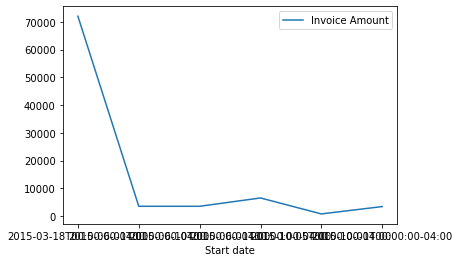

In [37]:
ATLAS_with_fixed_dates.plot.line(x="Start date", y="Invoice Amount")

In [51]:
atlas_subscriptions = ATLAS_with_fixed_dates.index = ATLAS_with_fixed_dates["Subscription"]
atlas_subscriptions.head()

ATLAS_with_fixed_dates["Subscription"].index

Index(['1 Year', '1 Year', '1 Year', '1 Year', '1 Year', '18 mo'], dtype='object', name='Subscription')

In [44]:
atlas_subscriptions.plot.bar(x="Start date", y="Invoice Amount")

TypeError: no numeric data to plot